# 特征工程

In [3]:
#coding:utf-8
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
# 载入数据
train = pd.read_csv("../../Kaggle_data/feature/Train.csv",encoding='ISO-8859-1')
test = pd.read_csv("../../Kaggle_data/feature/Test.csv",encoding='ISO-8859-1')

In [10]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [11]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [12]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [13]:
#合成一个总的data

# 给原数据加了一个标签
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

### 数据应用/建模一个很重要的工作就是，看看异常点，比如说 缺省值

In [14]:
data.apply(lambda x: sum(x.isnull())) # 这个命令是统计每个属性中没有值的个数

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [15]:
data.count() # 这个命令则是统计属性中有值的个数，可以说是上面的 “逆”

City                     123336
DOB                      124737
Device_Type              124737
Disbursed                 87020
EMI_Loan_Submitted        39836
Employer_Name            124624
Existing_EMI             124626
Filled_Form              124737
Gender                   124737
ID                       124737
Interest_Rate             39836
Lead_Creation_Date       124737
Loan_Amount_Applied      124626
Loan_Amount_Submitted     75202
Loan_Tenure_Applied      124626
Loan_Tenure_Submitted     75202
LoggedIn                  87020
Mobile_Verified          124737
Monthly_Income           124737
Processing_Fee            39391
Salary_Account           107936
Source                   124737
Var1                     124737
Var2                     124737
Var4                     124737
Var5                     124737
source                   124737
dtype: int64

### 要对数据有更深的认识，比如说，咱们看看这些字段，分别有多少种取值(甚至你可以看看分布)

In [17]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print('\n%s这一列数据的不同取值和出现的次数\n'%v)
    print(data[v].value_counts())  # 统计该属性中 不同值出现的次数


Gender这一列数据的不同取值和出现的次数

Male      71398
Female    53339
Name: Gender, dtype: int64

Salary_Account这一列数据的不同取值和出现的次数

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank            

### 开始处理字段特征

In [18]:
# City字段的处理
len(data['City'].unique())

724

In [19]:
# 发现city字段特征值比较多，这个字段粗暴的做法是直接去掉
data.drop('City',axis=1,inplace=True)

In [20]:
# DOB字段处理，该字段是出生的具体日期，年龄段可能对我们有用，所以计算一下年龄段就好

In [21]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [22]:
#创建一个年龄的字段Age
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [23]:
#把原始的DOB字段去掉:
data.drop('DOB',axis=1,inplace=True)

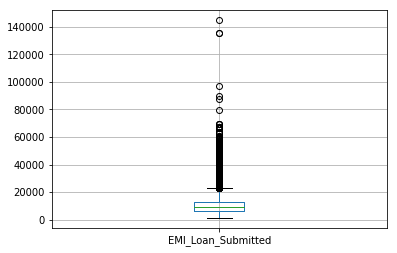

In [24]:
# EMI_Load_Submitted字段处理
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [25]:
#好像缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [26]:
#原始那一列就可以不要了
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [27]:
# Employer Name字段处理
# 首先看看个数
len(data['Employer_Name'].value_counts())

57193

In [28]:
# 懒癌晚期之间删掉
data.drop('Employer_Name',axis=1,inplace=True)

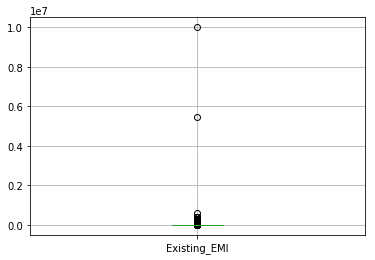

In [29]:
# Existing_EMI字段的处理

# 查看数据分布
data.boxplot(column='Existing_EMI',return_type='axes')

In [30]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [31]:
#缺省值不多，用均值代替
data['Existing_EMI'].fillna(0, inplace=True)

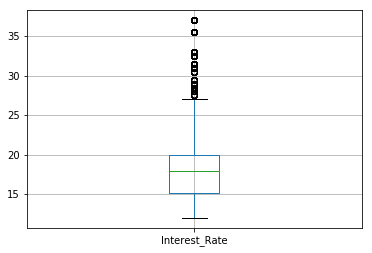

In [32]:
# Interest_Rate字段
data.boxplot(column=['Interest_Rate'],return_type='axes')

In [33]:
#缺省值太多，也造一个字段，表示有无
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['Interest_Rate','Interest_Rate_Missing']].head(10)

,Interest_Rate,Interest_Rate_Missing
0,NaN,1
1,13.25,0
2,NaN,1
3,NaN,1
4,NaN,1
5,13.99,0
6,NaN,1
7,NaN,1
8,14.85,0
9,18.25,0


In [34]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [35]:
# Lead Creation Date字段 丢弃
data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [36]:
# Loan Amount and Tenure applied字段
# 找到中间值去填补缺省
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [37]:
# Loan Amount and Tenure selected
# 对于缺省值过多的情况 我们还是老样子进行处理
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [38]:
#原来的字段就没用了
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [39]:
# 删除其他一些没有想好处理方式 或者 直接无用的字段
data.drop('LoggedIn',axis=1,inplace=True)
data.drop('Salary_Account',axis=1,inplace=True)

In [40]:
# Processing_Fee
#和之前一样的处理，有或者没有
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#旧的字段不要了
data.drop('Processing_Fee',axis=1,inplace=True)

In [41]:
data['Source'].head()

0    S122
1    S122
2    S143
3    S143
4    S134
Name: Source, dtype: object

In [42]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

### 最终的数据格式

In [43]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,5.0,N,20000,...,G,1,0,train,37,1,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,2.0,Y,35000,...,G,3,13,train,30,0,0,0,0,1
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,4.0,Y,22500,...,B,1,0,train,34,1,1,0,0,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,5.0,Y,35000,...,B,3,10,train,28,1,1,0,0,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,2.0,Y,100000,...,B,3,17,train,31,1,1,0,0,1


## 对var进行编码

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [45]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,1,0.0,0.0,0,0,ID000002C20,300000.0,5.0,0,20000,...,6,1,0,train,37,1,1,1,1,1
1,1,0.0,0.0,0,1,ID000004E40,200000.0,2.0,1,35000,...,6,3,13,train,30,0,0,0,0,1
2,1,0.0,0.0,0,1,ID000007H20,600000.0,4.0,1,22500,...,1,1,0,train,34,1,1,0,0,1
3,1,0.0,0.0,0,1,ID000008I30,1000000.0,5.0,1,35000,...,1,3,10,train,28,1,1,0,0,1
4,1,0.0,25000.0,0,1,ID000009J40,500000.0,2.0,1,100000,...,1,3,17,train,31,1,1,0,0,1


In [46]:
data.dtypes

Device_Type                        int64
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                        int64
Gender                             int64
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                    int64
Monthly_Income                     int64
Source                             int64
Var1                               int64
Var2                               int64
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [47]:
data.columns

Index(['Device_Type', 'Disbursed', 'Existing_EMI', 'Filled_Form', 'Gender',
       'ID', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Mobile_Verified',
       'Monthly_Income', 'Source', 'Var1', 'Var2', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing'],
      dtype='object')

In [48]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [49]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [50]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

/Users/lxp/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lxp/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
